#KÜTÜPHANELER

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


In [ ]:
#VERİ SETİ

In [2]:
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['target']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X=iris.data
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)


#MODEL

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_knn=knn.predict(X_test)
mse=mean_squared_error(y_test,y_pred_knn)
print("Hata puanı:",mse)

Hata puanı: 0.022222222222222223


#SVR

In [ ]:
from sklearn.svm import SVR
epsilon=0.1
svr=SVR(kernel="linear",epsilon=epsilon)
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred_svr=svr.predict(X_test)
mse=mean_squared_error(y_test,y_pred_svr)
print("Hata puanı:",mse)

Hata puanı: 0.05950057760435969


#Yapay Sinir Ağı

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
giris_verileri=np.array([[0],[1],[2],[3],[4],[5]])
cikis_verileri=np.array([0,1,4,9,16,25])
model=Sequential([
      Dense(units=1,input_shape=(1,))
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Optimizasyon

In [ ]:
model.compile(optimizer="sgd",loss="mean_squared_error")


#Eğitim

In [ ]:
model.fit(giris_verileri,cikis_verileri,epochs=100,verbose=0)
print("Tahminler:",model.prediction(np.array([[6],[7],[8]])))





ValueError: You must call `compile()` before using the model.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model_lineer=LinearRegression()
model_lineer.fit(giris_verileri,cikis_verileri)
print(model_lineer.predict(np.array([[6],[7],[8]])))
mse=mean_squared_error(cikis_verileri,model_lineer.predict(giris_verileri))
print("Hata puanı:",mse)

[26.66666667 31.66666667 36.66666667]
Hata puanı: 6.222222222222224


#CART


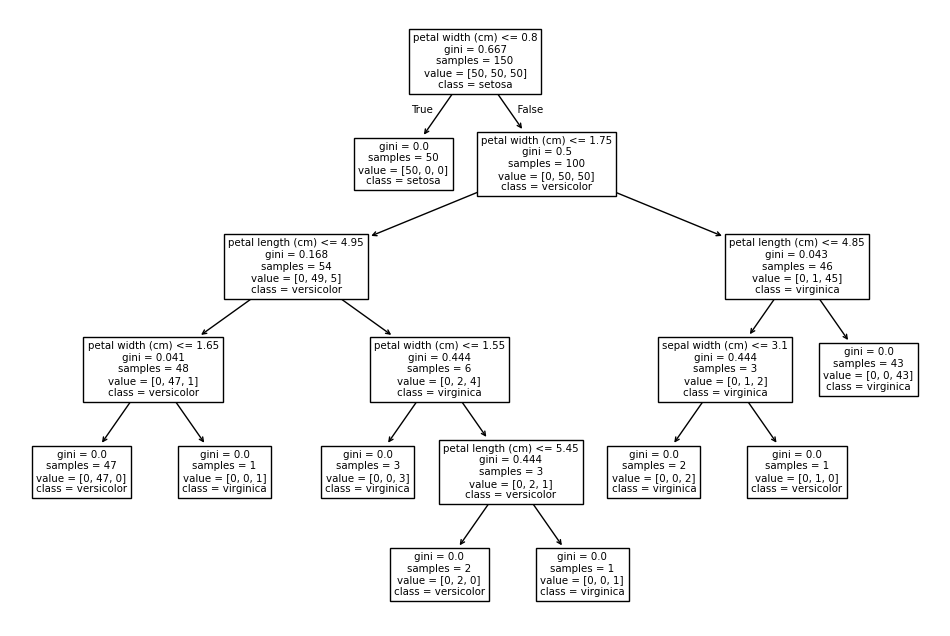

In [ ]:
X=iris.data
y=iris.target
from sklearn.tree import plot_tree,DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X,y)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(model,feature_names=iris.feature_names,class_names=iris.target_names)
plt.show()

#Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=15)
model=RandomForestClassifier(n_estimators=10,random_state=15)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Doğruluk oranı:",accuracy)


Doğruluk oranı: 0.95


#Adaboost

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
model=AdaBoostClassifier(n_estimators=10,random_state=15)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
basari_skoru=accuracy_score(y_test,y_pred)
print("Başarı skoru:",basari_skoru)

Başarı skoru: 0.9666666666666667
